# Analiza i projektiranje računalom #

### 4. Domaća zadaća -  _Genetski algoritam_ ###

Učitavanje potrebnih biblioteka.

In [3955]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 3. Zadatak ###

Učitavanje podatka iz datoteka.

In [4031]:
f6d3d = np.loadtxt('data/f6d3d.txt')
f6d6d = np.loadtxt('data/f6d6d.txt')
f7d3d = np.loadtxt('data/f7d3d.txt')
f7d6d = np.loadtxt('data/f7d6d.txt')
f6d3b = np.loadtxt('data/f6d3b.txt')
f6d6b = np.loadtxt('data/f6d6b.txt')
f7d3b = np.loadtxt('data/f7d3b.txt')
f7d6b = np.loadtxt('data/f7d6b.txt')

Funkcija koja ispisuje statistiku za zadani vektor.

In [4032]:
def statistics(fitness_vector, tol=-1e-6):
    print('Broj pogodataka:', np.count_nonzero(fitness_vector > tol), '/', len(fitness_vector))
    print('Srednja vrijednost:', np.mean(fitness_vector))
    print('Medijan:           ', np.median(fitness_vector))
    print('Najbolja dobrota:  ', np.max(fitness_vector))

Statistika za funkciju **f6** dimenzije **3** i **decimalnog** prikaza.

In [4033]:
statistics(f6d3d)

Broj pogodataka: 11 / 30
Srednja vrijednost: -0.0053917666037689195
Medijan:            -0.007575688806908315
Najbolja dobrota:   -1.3006941834703412e-07


Statistika za funkciju **f6** dimenzije **3** i **binarnog** prikaza.

In [4034]:
statistics(f6d3b)

Broj pogodataka: 2 / 30
Srednja vrijednost: -0.018237632689464826
Medijan:            -0.009715909890817553
Najbolja dobrota:   -8.756956150213213e-07


Statistika za funkciju **f6** dimenzije **6** i **decimalnog** prikaza.

In [3960]:
statistics(f6d6d)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.009715910003155743
Medijan:            -0.0097159098775145
Najbolja dobrota:   -0.009715909877514362


Statistika za funkciju **f6** dimenzije **6** i **binarnog** prikaza.

In [3961]:
statistics(f6d6b)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.009715915388328679
Medijan:            -0.009715910237574094
Najbolja dobrota:   -0.009715909885101737


Statistika za funkciju **f7** dimenzije **3** i **decimalnog** prikaza.

In [3962]:
statistics(f7d3d)

Broj pogodataka: 30 / 30
Srednja vrijednost: -8.767170989498859e-07
Medijan:            -9.188991292132038e-07
Najbolja dobrota:   -5.893636592211277e-07


Statistika za funkciju **f7** dimenzije **3** i **binarnog** prikaza.

In [3963]:
statistics(f7d3b)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.010398223660750402
Medijan:            -0.007209012150852522
Najbolja dobrota:   -0.007209012150852522


Statistika za funkciju **f7** dimenzije **6** i **decimalnog** prikaza.

In [3964]:
statistics(f7d6d)

Broj pogodataka: 13 / 30
Srednja vrijednost: -0.005211007859569802
Medijan:            -0.005364481906723688
Najbolja dobrota:   -7.515566893408809e-07


Statistika za funkciju **f7** dimenzije **6** i **binarnog** prikaza.

In [3965]:
statistics(f7d6b)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.17046535110528593
Medijan:            -0.1786967432550447
Najbolja dobrota:   -0.128094577487384


### 4. Zadatak ###

Učitavanje `population_sizes.csv` datoteke.

In [3966]:
population_sizes_df = pd.read_csv('data/population_sizes.csv')

Srednje vrijednosti po populacijama:

In [3967]:
population_sizes_df.mean()

30    -0.005908
50    -0.005522
100   -0.004273
200   -0.006624
dtype: float64

Medijani po populacijama:

In [3968]:
population_sizes_df.median()

30    -0.009716
50    -0.006491
100   -0.002161
200   -0.008561
dtype: float64

Najbolje dobrote po populacijama:

In [3969]:
population_sizes_df.max()

30    -8.621122e-07
50    -1.999385e-06
100   -7.804601e-07
200   -8.701971e-05
dtype: float64

**Boxplot** za `population_sizes_df`:

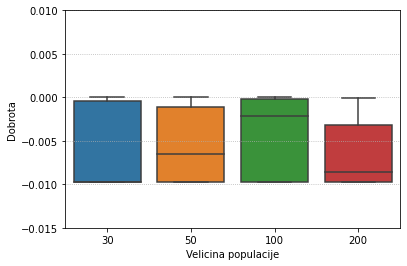

In [3970]:
sns.boxplot(data=population_sizes_df)
plt.ylim(-0.015, 0.01)
plt.ylabel('Dobrota')
plt.xlabel('Velicina populacije')
plt.grid(True, linestyle='dotted', axis='y')
plt.show()

Učitavanje `mutations.csv` datoteke.

In [3971]:
mutations_df = pd.read_csv('data/mutations.csv')

Srednje vrijednosti za mutacije:

In [3972]:
mutations_df.mean()

0.1   -0.009696
0.3   -0.009388
0.6   -0.005037
0.9   -0.004142
dtype: float64

Medijani za mutacije:

In [3973]:
mutations_df.median()

0.1   -0.009716
0.3   -0.009716
0.6   -0.007520
0.9   -0.002075
dtype: float64

Najbolje dobrote za mutacije:

In [3974]:
mutations_df.max()

0.1   -9.132574e-03
0.3   -8.443794e-07
0.6   -1.043675e-07
0.9   -4.703656e-07
dtype: float64

**Boxplot** za `mutations_df`:

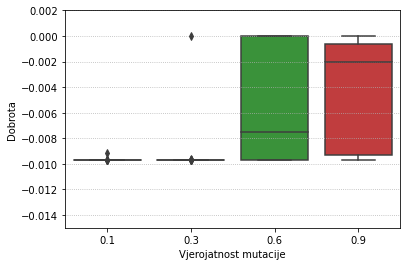

In [3975]:
sns.boxplot(data=mutations_df)
plt.ylim(-0.015, 0.002)
plt.ylabel('Dobrota')
plt.xlabel('Vjerojatnost mutacije')
plt.grid(True, linestyle='dotted', axis='y')
plt.show()

Učitavanje `optimal_population_mutation.txt` datoteke.

In [3976]:
population_mutation = np.loadtxt('data/optimal_population_mutation.txt')

Statistika za optimalnu veličinu populacije i vjerojatnost mutacije:

In [3977]:
statistics(population_mutation)

Broj pogodataka: 4 / 30
Srednja vrijednost: -0.004106776884304964
Medijan:            -0.003512966814179508
Najbolja dobrota:   -2.3662243203714795e-07


### 5. Zadatak ###

Učitavanje `tournaments.csv` datoteke.

In [3978]:
tournaments_df = pd.read_csv('data/tournaments.csv')

Srednje vrijednosti za turnire:

In [3979]:
tournaments_df.mean()

3    -0.006057
5    -0.003738
10   -0.004069
15   -0.005397
20   -0.006346
25   -0.005850
30   -0.005769
40   -0.006728
50   -0.005335
dtype: float64

Medijani za turnire:

In [3980]:
tournaments_df.median()

3    -0.007926
5    -0.000299
10   -0.002480
15   -0.006129
20   -0.009716
25   -0.009319
30   -0.008711
40   -0.009716
50   -0.004992
dtype: float64

Najbolje dobrote za turnire:

In [3981]:
tournaments_df.max()

3    -5.081504e-07
5    -3.955297e-08
10   -3.039447e-07
15   -8.076234e-07
20   -3.035579e-05
25   -3.653028e-06
30   -1.455029e-05
40   -1.287693e-05
50   -8.192411e-05
dtype: float64

**Boxplot** za `tournaments_df`:

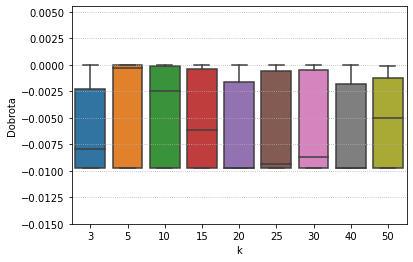

In [3982]:
sns.boxplot(data=tournaments_df)
plt.ylim(-0.015, 0.0055)
plt.ylabel('Dobrota')
plt.xlabel('k')
plt.grid(True, linestyle='dotted', axis='y')
plt.show()

Učitavanje `optimal_population_mutation_tournament.txt` datoteke.

In [3983]:
population_mutation_tournament = np.loadtxt('data/optimal_population_mutation_tournament.txt')

Statistika za optimalnu veličinu populacije, vjerojatnost mutacije i turnira:

In [3984]:
statistics(population_mutation_tournament)

Broj pogodataka: 2 / 30
Srednja vrijednost: -0.006062381259868044
Medijan:            -0.008141758713982566
Najbolja dobrota:   -7.021841772480997e-07
